## Load Dataset, Explore & Visualize

In [2]:
# Import required libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [3]:
# Define transformations (Normalize pixel values)
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Load dataset
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
# Split training data into training & validation
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_dataset, val_dataset = random_split(train_data, [train_size, val_size])
# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
# Class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Explore dataset
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Testing samples: {len(test_data)}")

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.92MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.7MB/s]

Training samples: 48000
Validation samples: 12000
Testing samples: 10000


## Exploring the data

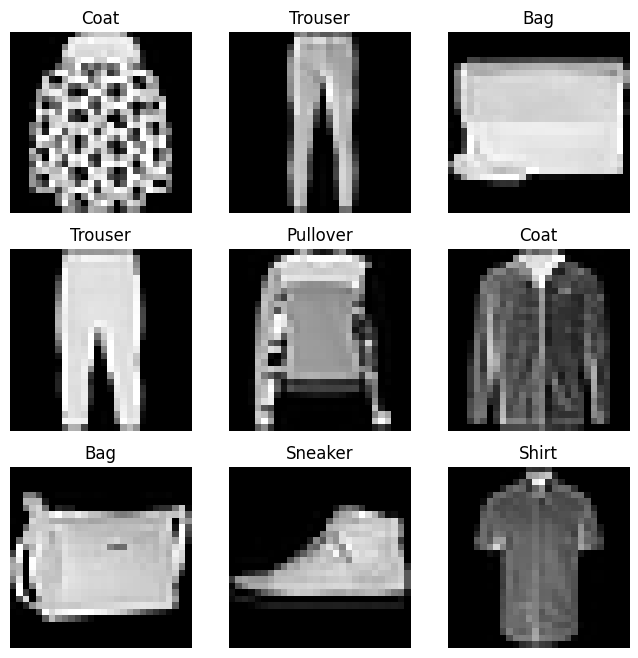

In [4]:
# Sample Image Visualizations
images, labels = next(iter(train_loader))
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(classes[labels[i]])
    plt.axis('off')
plt.show()

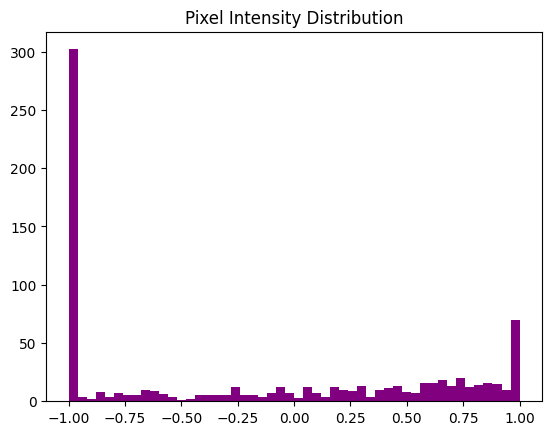

In [5]:
# Pixel intensity distribution
plt.hist(images[0].view(-1).numpy(), bins=50, color='purple')
plt.title("Pixel Intensity Distribution")
plt.show()

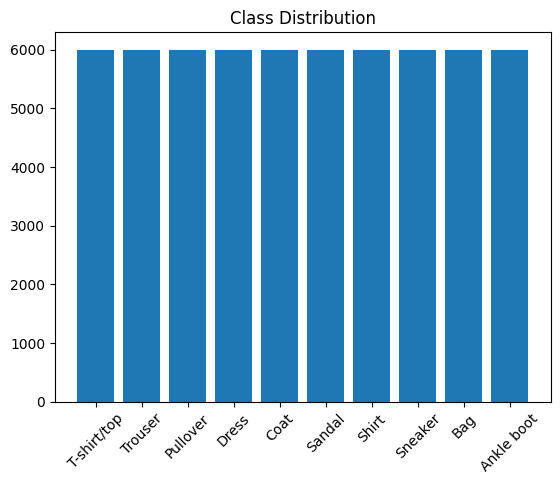

In [6]:
# Class distribution
labels_all = [label for _, label in train_data]
plt.hist(labels_all, bins=np.arange(11)-0.5, rwidth=0.8)
plt.xticks(range(10), classes, rotation=45)
plt.title("Class Distribution")
plt.show()

## Machine learning Model

### ANN (MLP) Model

In [7]:
# Define ANN model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
# Initialize model, loss, optimizer
ann = ANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ann.parameters(), lr=0.001)

In [8]:
# Training loop
epochs = 10
train_losses, val_losses, train_accs, val_accs = [], [], [], []
for epoch in range(epochs):
    ann.train()
    correct, total, running_loss = 0, 0, 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = ann(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    train_losses.append(running_loss / len(train_loader))
    train_accs.append(100 * correct / total)
    # Validation
    ann.eval()
    correct, total, val_loss = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = ann(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    val_losses.append(val_loss / len(val_loader))
    val_accs.append(100 * correct / total)
    print(f"Epoch [{epoch+1}/{epochs}] -> Train Acc: {train_accs[-1]:.2f}%, Val Acc: {val_accs[-1]:.2f}%")

Epoch [1/10] -> Train Acc: 80.17%, Val Acc: 85.23%
Epoch [2/10] -> Train Acc: 84.81%, Val Acc: 86.32%
Epoch [3/10] -> Train Acc: 86.21%, Val Acc: 87.47%
Epoch [4/10] -> Train Acc: 87.16%, Val Acc: 87.28%
Epoch [5/10] -> Train Acc: 87.71%, Val Acc: 87.65%
Epoch [6/10] -> Train Acc: 88.14%, Val Acc: 87.90%
Epoch [7/10] -> Train Acc: 88.54%, Val Acc: 88.47%
Epoch [8/10] -> Train Acc: 89.01%, Val Acc: 89.15%
Epoch [9/10] -> Train Acc: 89.42%, Val Acc: 88.38%
Epoch [10/10] -> Train Acc: 89.65%, Val Acc: 89.18%


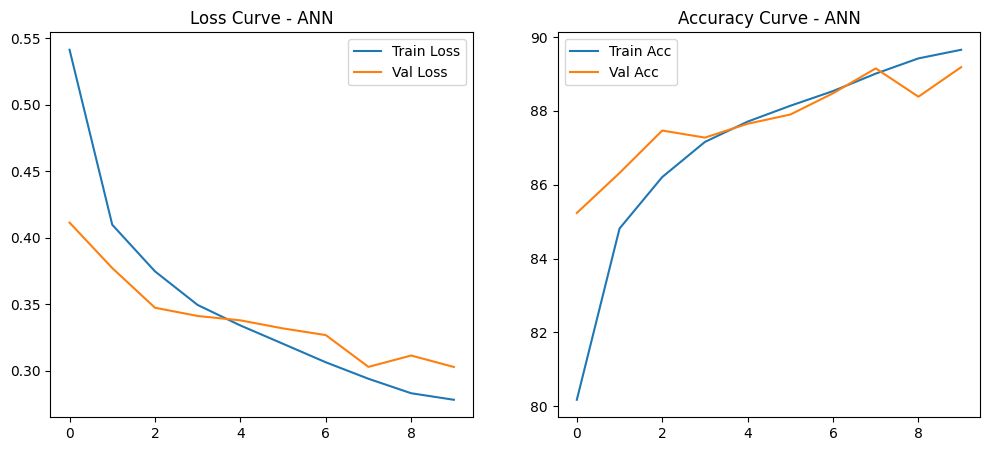

In [9]:
# Plot accuracy & loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title("Loss Curve - ANN")
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.title("Accuracy Curve - ANN")
plt.legend()
plt.show()


 ANN Test Accuracy: 88.01%

Classification Report (ANN):
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.82      0.81      1000
       Dress       0.90      0.86      0.88      1000
        Coat       0.84      0.75      0.80      1000
      Sandal       0.95      0.96      0.95      1000
       Shirt       0.67      0.73      0.70      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



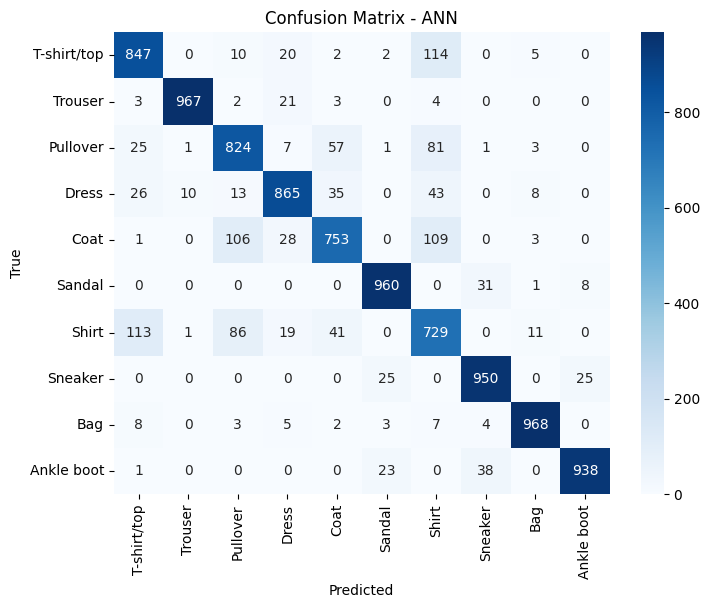

In [10]:
# Evaluate on test set
ann.eval()
y_true_ann, y_pred_ann = [], []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = ann(images)
        _, predicted = torch.max(outputs, 1)
        y_true_ann.extend(labels.tolist())
        y_pred_ann.extend(predicted.tolist())
# Accuracy score
acc_ann = accuracy_score(y_true_ann, y_pred_ann)
print(f"\n ANN Test Accuracy: {acc_ann * 100:.2f}%")
# Classification report
print("\nClassification Report (ANN):")
print(classification_report(y_true_ann, y_pred_ann, target_names=classes))
# Confusion matrix
cm_ann = confusion_matrix(y_true_ann, y_pred_ann)
plt.figure(figsize=(8,6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix - ANN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [11]:
# Normalize confusion matrix
cm_ann_norm = cm_ann.astype(np.float32) / cm_ann.sum(axis=1, keepdims=True)
# Define visually similar classes
similar_classes = [('Shirt', 'Coat'), ('Shirt', 'Pullover'), ('Pullover', 'Coat')]
print("\n ANN - Confusion between visually similar classes (as % of true class):")
for a, b in similar_classes:
    i, j = classes.index(a), classes.index(b)
    print(f"{a} → {b}: {cm_ann_norm[i, j]*100:.2f}%")


 ANN - Confusion between visually similar classes (as % of true class):
Shirt → Coat: 4.10%
Shirt → Pullover: 8.60%
Pullover → Coat: 5.70%


### CNN Model

In [12]:
# Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64*7*7)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
cnn = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)
epochs = 10
train_losses, val_losses, train_accs, val_accs = [], [], [], []

In [13]:
# Training
for epoch in range(epochs):
    cnn.train()
    correct, total, running_loss = 0, 0, 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    train_losses.append(running_loss / len(train_loader))
    train_accs.append(100 * correct / total)
    # Validation
    cnn.eval()
    correct, total, val_loss = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = cnn(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    val_losses.append(val_loss / len(val_loader))
    val_accs.append(100 * correct / total)
    print(f"Epoch [{epoch+1}/{epochs}] -> Train Acc: {train_accs[-1]:.2f}%, Val Acc: {val_accs[-1]:.2f}%")

Epoch [1/10] -> Train Acc: 81.57%, Val Acc: 88.37%
Epoch [2/10] -> Train Acc: 88.39%, Val Acc: 89.62%
Epoch [3/10] -> Train Acc: 90.02%, Val Acc: 90.92%
Epoch [4/10] -> Train Acc: 91.22%, Val Acc: 91.29%
Epoch [5/10] -> Train Acc: 92.05%, Val Acc: 91.54%
Epoch [6/10] -> Train Acc: 92.99%, Val Acc: 91.80%
Epoch [7/10] -> Train Acc: 93.54%, Val Acc: 91.56%
Epoch [8/10] -> Train Acc: 94.34%, Val Acc: 92.20%
Epoch [9/10] -> Train Acc: 94.80%, Val Acc: 92.67%
Epoch [10/10] -> Train Acc: 95.42%, Val Acc: 92.05%


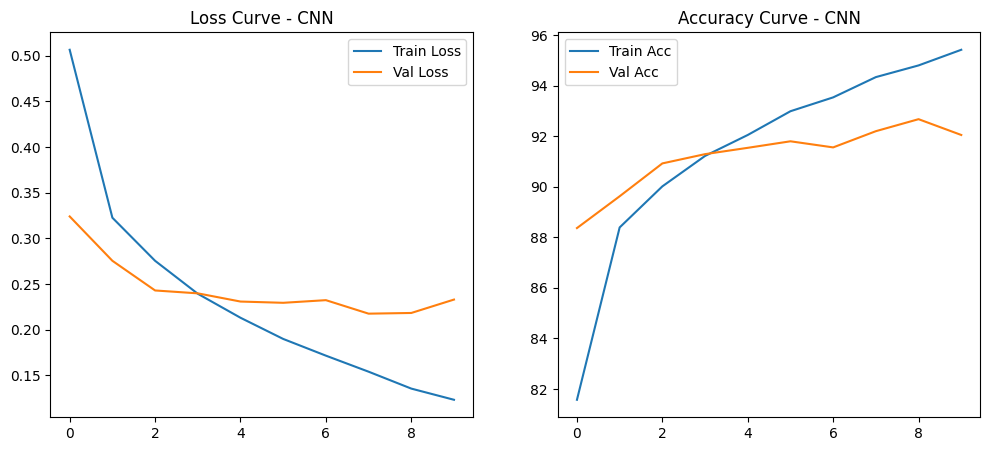

In [14]:
# Plot accuracy & loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title("Loss Curve - CNN")
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.title("Accuracy Curve - CNN")
plt.legend()
plt.show()


 CNN Test Accuracy: 91.43%

Classification Report (CNN):
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.83      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.86      0.88      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.87      0.86      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.71      0.81      0.75      1000
     Sneaker       0.98      0.94      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.92      0.91      0.92     10000



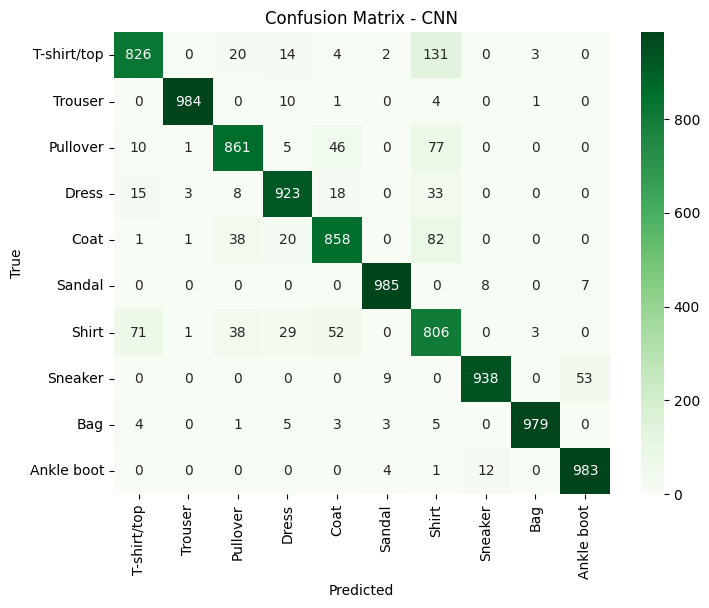

In [15]:
# Evaluate on test set
cnn.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = cnn(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())
# Accuracy score
acc_cnn = accuracy_score(y_true, y_pred)
print(f"\n CNN Test Accuracy: {acc_cnn * 100:.2f}%")
# Classification report
print("\nClassification Report (CNN):")
print(classification_report(y_true, y_pred, target_names=classes))
# Confusion matrix
cm_cnn = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens',
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [16]:
# Identify high-confusion pairs from the confusion matrix
cm = cm_cnn.astype(np.float32)
cm_norm = cm / cm.sum(axis=1, keepdims=True)
# Print confusion percentages for similar-looking classes
similar_classes = [('Shirt', 'Coat'), ('Shirt', 'Pullover'), ('Pullover', 'Coat')]
print("\n Confusion between visually similar classes (as % of true class):")
for a, b in similar_classes:
    i, j = classes.index(a), classes.index(b)
    print(f"{a} → {b}: {cm_norm[i, j]*100:.2f}%")


 Confusion between visually similar classes (as % of true class):
Shirt → Coat: 5.20%
Shirt → Pullover: 3.80%
Pullover → Coat: 4.60%


## Model comparison

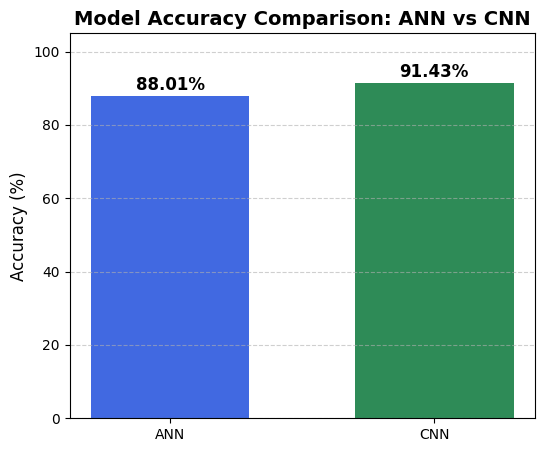

In [17]:
# Model names and accuracies (in %)
models = ['ANN', 'CNN']
accuracies = [acc_ann * 100, acc_cnn * 100]  # convert to percentage
# Create bar plot
plt.figure(figsize=(6,5))
bars = plt.bar(models, accuracies, color=['royalblue', 'seagreen'], width=0.6)
# Add text labels (accuracy values) on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{acc:.2f}%", ha='center', va='bottom', fontsize=12, fontweight='bold')
# Customize plot
plt.title("Model Accuracy Comparison: ANN vs CNN", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()